In [1]:
from ipywidgets import widgets
from IPython.display import display
import Main
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import pandas as pd
from imutils import build_montages


In [2]:
nome_do_caso = ""

In [5]:
text = widgets.Text(
    value='Nome do processo',
    placeholder='Paste ticket description here!',
    description='Processo :',
    disabled=False
)
display(text)

def callback(wdgt):
    display(f"Nome {wdgt.value} Salvo")

text.on_submit(callback)


Text(value='Nome do processo', description='Processo :', placeholder='Paste ticket description here!')

'Nome nome_do_caso Salvo'

In [6]:
nome_do_caso = text.value
nome_do_caso

'nome_do_caso'

In [7]:
df = Main.comecar_processamento(nome_do_caso)

In [8]:
def show_clusters_main_face(nome_do_caso : str, tamanho_da_imagem : tuple = (8,14)):
    path = f"user/dataset/exit_data/{nome_do_caso}/cluster_imgs"
    files = os.listdir(path)
    fig = plt.figure(figsize=(5,5))
    rows = int(0.3 * len(files)) + 1
    cols = len(files) - rows
    for i,file in enumerate(files):
        plt.subplot(rows, cols, i + 1)    
        img = cv2.imread(f"{path}/{file}")
        # cv2_imshow(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.axis("off")
        plt.imshow(img)
        plt.title(file[:-4])
    plt.show()

In [9]:
def show_cluster_random_faces(df_l:pd.DataFrame, cluster_number:int, faces_count : int = 16, figure_size : tuple = (96,96)):
    idxs = df_l[df_l["cluster"] == cluster_number]
    idx = idxs.sample(min(faces_count, len(idxs)))
    fig = plt.figure(figsize=(18,18))

    size = math.sqrt(faces_count)
    if size % 1 > 0:
        size = int(size) + 1
    size = int(size)
    
    for i,line in idx.iterrows():
        image = cv2.imread(line["imagePath"])
        top, right, bottom, left = line["face_locations"]
        face = image[int(top):int(bottom), int(left):int(right)]
        face = cv2.resize(face, figure_size)
        
        plt.subplot(size, size, i + 1)
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        plt.axis("off")
        plt.imshow(face)
        plt.title(line["imagePath"].split("/")[-1][:-4])

In [28]:
def generate_cluster_connections(df:pd.DataFrame):
    connection_df = df.drop(columns = ["face_locations", "encoding"])
    connection_df = connection_df.merge(connection_df, on = "imagePath")
    connection_df = connection_df.query("cluster_x < cluster_y")
    connection_df = connection_df.copy()
    connection_df.drop_duplicates(inplace= True)
    occurrences = connection_df.groupby(by="cluster_x").apply(lambda a:( a["cluster_y"].tolist()))
    connection_df = connection_df.sort_values(by=['cluster_x', 'cluster_y']).drop_duplicates(subset=['cluster_x', 'cluster_y']).reset_index(drop=True)
    result = []
    for i,occurrence in enumerate(occurrences):
        fitered = np.unique(np.array(occurrence), return_counts = True)
        result.extend(fitered[1])

    connection_df["occurrence"] = result

    self_pointg_df = {"imagePath" : [], "cluster_x" : [],"cluster_y" : [], "occurrence" : []}
    for cluster in df["cluster"].unique():
        im_path = df[df["cluster"] == cluster]["imagePath"].values[0]
        self_pointg_df["imagePath"].append(im_path)
        self_pointg_df["cluster_x"].append(cluster)
        self_pointg_df["cluster_y"].append(cluster)
        self_pointg_df["occurrence"].append(1)

    aux_df = pd.DataFrame(self_pointg_df)
    connection_df = pd.concat([connection_df, aux_df])
    return connection_df

In [11]:
def show_cluster_connections(cluster:int, nome_do_caso : str , conection_df: pd.DataFrame):
    path = f"user/dataset/exit_data/{nome_do_caso}/cluster_imgs"
    files = os.listdir(path)
    file = files.pop(cluster)
    
    fig = plt.figure(figsize=(2,2))
    plt.subplot(1, 1, 1)    
    img = cv2.imread(f"{path}/{file}")
    # cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)
    plt.title(f"cluster: {file[:-4]}")
    plt.show()
    
    
    fig = plt.figure(figsize=(5,5))
    rows = int(0.3 * len(files)) + 1
    cols = len(files) - rows
    for i,file in enumerate(files):
        plt.subplot(rows, cols, i + 1)    
        img = cv2.imread(f"{path}/{file}")
        # cv2_imshow(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.axis("off")
        plt.imshow(img)

        if(i > cluster):
            line = conection_df[(conection_df["cluster_x"] == cluster) & (conection_df["cluster_y"] == i)]
        else:
            line = conection_df[(conection_df["cluster_x"] == i) & (conection_df["cluster_y"] == cluster)]

        plt.title(f"cluster: {file[:-4]}\nconexão: {0 if len(line) == 0 else line.iloc[0]['occurrence']}")
    plt.show()

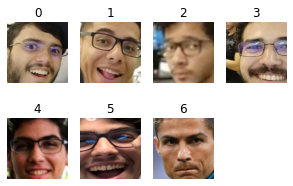

In [12]:
show_clusters_main_face(nome_do_caso, (10,10))

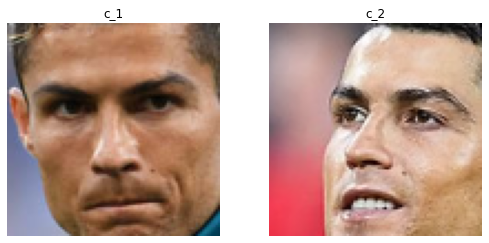

In [20]:
show_cluster_random_faces(df, 6)

In [24]:
conection_df = generate_cluster_connections(df)

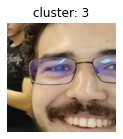

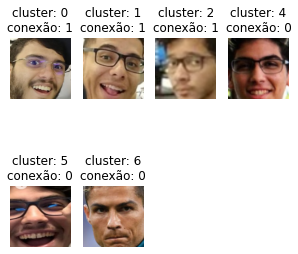

In [29]:
show_cluster_connections(3, nome_do_caso, conection_df)

In [16]:
df

,imagePath,face_locations,encoding,cluster
1,user/dataset/input_data/0.jpg,"(357, 225, 561, 21)","[-0.13773472607135773, 0.012212363071739674, 0...",0
2,user/dataset/input_data/0.jpg,"(282, 358, 380, 259)","[-0.04357041046023369, 0.07730134576559067, 0....",1
3,user/dataset/input_data/0.jpg,"(236, 466, 283, 419)","[-0.06945769488811493, 0.07110682874917984, 0....",2
4,user/dataset/input_data/0.jpg,"(265, 596, 435, 443)","[-0.050005655735731125, 0.12187620997428894, 0...",3
5,user/dataset/input_data/1.jpg,"(40, 175, 181, 34)","[-0.1498824506998062, 0.060111887753009796, 0....",4
6,user/dataset/input_data/2.jpg,"(148, 369, 246, 270)","[-0.13150076568126678, 0.008097297511994839, 0...",0
7,user/dataset/input_data/2.jpg,"(155, 121, 325, 0)","[-0.1323477029800415, 0.091831274330616, 0.031...",5
8,user/dataset/input_data/3.jpg,"(3, 207, 173, 37)","[-0.20166118443012238, 0.08111689239740372, 0....",4
9,user/dataset/input_data/c_1.jpg,"(81, 304, 222, 163)","[-0.21305277943611145, 0.14184381067752838, 0....",6
10,user/dataset/input_data/c_2.jpg,"(28, 147, 146, 29)","[-0.14442770183086395, 0.20080313086509705, 0....",6


In [99]:
conection_df

,imagePath,cluster_x,cluster_y,occurrence
0,user/dataset/input_data/0.jpg,0,1,1
1,user/dataset/input_data/0.jpg,0,2,1
2,user/dataset/input_data/0.jpg,0,3,1
3,user/dataset/input_data/2.jpg,0,6,1
4,user/dataset/input_data/0.jpg,1,2,1
5,user/dataset/input_data/0.jpg,1,3,1
6,user/dataset/input_data/0.jpg,2,3,1
0,user/dataset/input_data/0.jpg,0,0,1
1,user/dataset/input_data/0.jpg,1,1,1
2,user/dataset/input_data/0.jpg,2,2,1


In [73]:
conection_df

,imagePath,cluster_x,cluster_y,occurrence
0,user/dataset/input_data/0.jpg,0,1,1
1,user/dataset/input_data/0.jpg,0,2,1
2,user/dataset/input_data/0.jpg,0,3,1
3,user/dataset/input_data/2.jpg,0,6,1
4,user/dataset/input_data/0.jpg,1,2,1
5,user/dataset/input_data/0.jpg,1,3,1
6,user/dataset/input_data/0.jpg,2,3,1
0,user/dataset/input_data/0.jpg,0,0,1
1,user/dataset/input_data/0.jpg,1,1,1
2,user/dataset/input_data/0.jpg,2,2,1


In [77]:
2.1 

0.10000000000000009